## ***GMM***

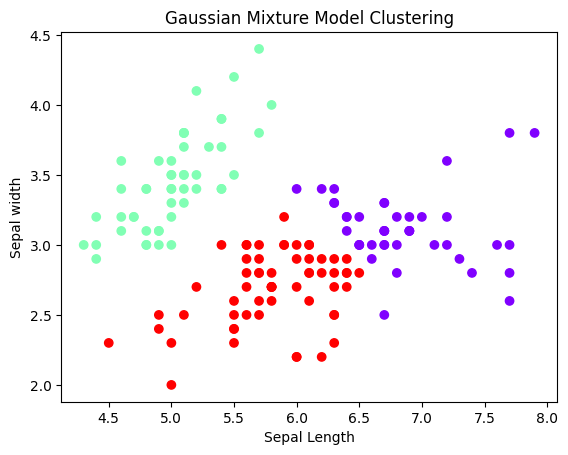

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#Load iris dataset
iris=load_iris()
x=iris.data[:, :2] #using only sepal length and sepal width

#Fit GMM with 3 components (clusters)
gmm = GaussianMixture(n_components=3)
gmm.fit(x)

#Predict the labels (cluster assignments)
labels=gmm.predict(x)

#Plot the results
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

## ***DBSCAN***

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

#Sample data
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

#DBSCAN model
dbscan=DBSCAN(eps=3, min_samples=2)

#Fit model
dbscan.fit(X)

#Cluster Labels
labels=dbscan.labels_
print(labels) # Output: [0 0 0 1 1 -1] (-1 is for noise)

[ 0  0  0  1  1 -1]


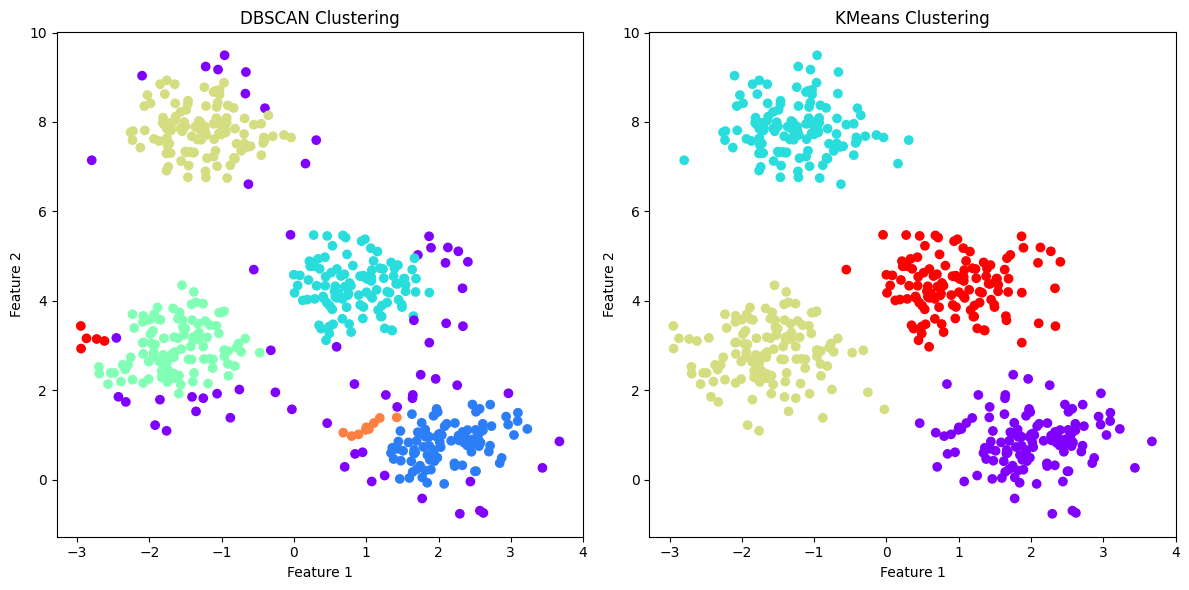

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, KMeans

# Generate a sample dataset
X,_=make_blobs (n_samples=500, centers=4, cluster_std=0.60, random_state=0)

#Apply DBSCAN
dbscan=DBSCAN(eps=0.3, min_samples=5)
dbscan_labels=dbscan.fit_predict(X)

#Apply KMeans
kmeans=KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(X)

#Plotting the clusters
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(12, 6))

#DBSCAN plot
ax1.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow')
ax1.set_title("DBSCAN Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

#KMeans plot
ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow')
ax2.set_title("KMeans Clustering")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [ ]:
# Load and preprocess dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Bagging, AdaBoost, and Gradient Boosting models
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Bagging
bagging = BaggingClassifier(RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train_scaled, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test_scaled))

# AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train_scaled, y_train)
ada_acc = accuracy_score(y_test, ada.predict(X_test_scaled))
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)  # Learning rate initializes the weights
gb.fit(X_train_scaled, y_train)
gb_acc = accuracy_score(y_test, gb.predict(X_test_scaled))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test_scaled))
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

import pandas as pd
results_df=pd.DataFrame({
    "Model":["Bagging", "AdaBoost", "Gradient Boosting", "XGBoosting"],
    "Accuracy":[bagging_acc, ada_acc, gb_acc, xgb_acc]
})
results_df

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:43:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy
0,Bagging,0.964912
1,AdaBoost,0.964912
2,Gradient Boosting,0.956140
3,XGBoosting,0.956140
